In [1]:
import warnings
warnings.filterwarnings('ignore'
                       )
%config Completer.use_jedi = False
%matplotlib inline

In [2]:
tot_perfect_regret = {}
tot_comm_regret = {}
tot_marginal_regret = {}
tot_cluster_regret = {}
tot_cluster_rev_regret = {}
tot_comm_fixed_regret = {}
tot_comm_rev_regret = {}
tot_comm_marginal_regret = {}

tot_perfect_rate = {}
tot_cluster_rate = {}

In [14]:
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt
import scipy as sp
from copy import copy
import pandas as pd
import pickle


from scipy.stats import binom, bernoulli, norm, beta

# from comm_bandits.it.kl_minimization import compute_u, joint_entropy, blahut_arimoto_kl_d_r
from comm_bandits.cluster.cluster import cluster_state_with_centroids, compute_centroids, state_reduction
from comm_bandits.utils.plotting import plot_distributions
from comm_bandits.agent.thompson import GaussianThompsonAgent, BernoulliThompsonAgent, RateBernoulliThompson
from comm_bandits.agent.exp3 import Exp3Agent
from comm_bandits.agent.policy_agent import PolicyAgent, OptimalAgent


In [40]:
# Load Agents

experiment = 'lim_training_uniform_fs_dist_0_32_a_32_s_16'
sim_num = 3

perfect_agent = pickle.load(open("comm_bandits/results/{}/perfect_agent_{}.pkl".format(experiment, sim_num), "rb"))
comm_agent = pickle.load(open("comm_bandits/results/{}/comm_agent_{}.pkl".format(experiment, sim_num), "rb"))
cluster_rev_agent = pickle.load(open("comm_bandits/results/{}/cluster_rev_agent_{}.pkl".format(experiment, sim_num), "rb"))
comm_rev_agent = pickle.load(open("comm_bandits/results/{}/comm_rev_agent_{}.pkl".format(experiment, sim_num), "rb"))
comm_fixed_agent = pickle.load(open("comm_bandits/results/{}/comm_fixed_agent_{}.pkl".format(experiment, sim_num), "rb"))
comm_marginal_agent = pickle.load(open("comm_bandits/results/{}/comm_marginal_agent_{}.pkl".format(experiment, sim_num), "rb"))

cluster_agent = pickle.load(open("comm_bandits/results/{}/cluster_agent_{}.pkl".format(experiment, sim_num), "rb"))
optimal_agent = pickle.load(open("comm_bandits/results/{}/optimal_agent_{}.pkl".format(experiment, sim_num), "rb"))
"""marginal_agent = pickle.load(open("comm_bandits/results/{}/marginal_agent.pkl".format(experiment), "rb"))
"""

system_params = pickle.load(open("comm_bandits/results/{}/system_params_{}.pkl".format(experiment, sim_num), "rb"))

In [41]:
n_states = system_params['n_state']
n_actions = system_params['n_actions']
f_x = np.ones(n_states)/n_states


In [42]:
n_states = 32
n_actions = 32
f_x = np.ones(n_states)/n_states

# Regret # 

In [43]:
env_means = [np.asarray([system_params['env'][s][a].stats()[0] for a in np.arange(n_actions)])
            for s in np.arange(n_states)]


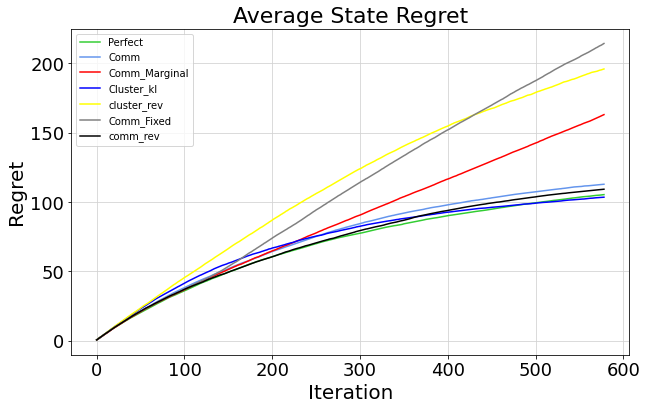

In [44]:
window_size = 1

min_size = 1000000
perfect_regret = []
comm_regret = []
marginal_regret = []
cluster_regret = []
cluster_rev_regret = []
comm_fixed_regret = []
comm_rev_regret = []
comm_marginal_regret = []

for s in range(n_states):
    perfect_regret_s = 0.8 - env_means[s][list(perfect_agent.histories[s].action)]
    perfect_regret_s = perfect_regret_s[~np.isnan(perfect_regret_s)]
    
    comm_regret_s = 0.8 - env_means[s][list(comm_agent.histories[s].action)]
    comm_regret_s = comm_regret_s[~np.isnan(comm_regret_s)]
    
    comm_marginal_regret_s = 0.8 - env_means[s][list(comm_marginal_agent.histories[s].action)]
    comm_marginal_regret_s = comm_marginal_regret_s[~np.isnan(comm_marginal_regret_s)]
    
    
    cluster_regret_s = 0.8 - env_means[s][list(cluster_agent.histories[s].action)]
    cluster_regret_s = cluster_regret_s[~np.isnan(cluster_regret_s)]
    
    comm_rev_regret_s = 0.8 - env_means[s][list(comm_rev_agent.histories[s].action)]
    comm_rev_regret_s = comm_rev_regret_s[~np.isnan(comm_rev_regret_s)]
    
    """marginal_regret_s = optimal_agent.histories[s].reward.rolling(window =window_size).mean() - marginal_agent.histories[s].reward.rolling(window =window_size).mean()
    marginal_regret_s = marginal_regret_s[~np.isnan(marginal_regret_s)]"""
    
    cluster_rev_regret_s = 0.8 - env_means[s][list(cluster_rev_agent.histories[s].action)]
    cluster_rev_regret_s = cluster_rev_regret_s[~np.isnan(cluster_rev_regret_s)]
    
    comm_fixed_regret_s = 0.8 - env_means[s][list(comm_fixed_agent.histories[s].action)]
    comm_fixed_regret_s = comm_fixed_regret_s[~np.isnan(comm_fixed_regret_s)]
    
    min_size = np.min([len(perfect_regret_s), len(comm_regret_s),  len(comm_rev_regret_s), len(cluster_regret_s),
                         len(cluster_rev_regret_s), min_size])
    
    perfect_regret.append(perfect_regret_s)
    comm_regret.append(comm_regret_s)
    comm_marginal_regret.append(comm_marginal_regret_s)
    cluster_regret.append(cluster_regret_s)
    cluster_rev_regret.append(cluster_rev_regret_s)
    comm_fixed_regret.append(comm_fixed_regret_s)
    comm_rev_regret.append(comm_rev_regret_s)
    
perfect_regret = np.dot(f_x, np.asarray([e[:min_size] for e in perfect_regret]))
comm_regret = np.dot(f_x, np.asarray([e[:min_size] for e in comm_regret]))
comm_marginal_regret = np.dot(f_x, np.asarray([e[:min_size] for e in comm_marginal_regret]))
cluster_regret = np.dot(f_x, np.asarray([e[:min_size] for e in cluster_regret]))
cluster_rev_regret = np.dot(f_x, np.asarray([e[:min_size] for e in cluster_rev_regret]))
comm_fixed_regret = np.dot(f_x, np.asarray([e[:min_size] for e in comm_fixed_regret]))
comm_rev_regret = np.dot(f_x, np.asarray([e[:min_size] for e in comm_rev_regret]))

perfect_regret = np.cumsum(perfect_regret)
comm_regret = np.cumsum(comm_regret)
comm_marginal_regret = np.cumsum(comm_marginal_regret)
cluster_regret = np.cumsum(cluster_regret)
cluster_rev_regret = np.cumsum(cluster_rev_regret)
comm_fixed_regret = np.cumsum(comm_fixed_regret)
comm_rev_regret = np.cumsum(comm_rev_regret)

fig = plt.figure(figsize=(10, 6))
plt.title('Average State Regret'.format(s), fontsize=22)
plt.plot(perfect_regret, color='limegreen', label="Perfect")
plt.plot(comm_regret, color='cornflowerblue', label="Comm")
plt.plot(comm_marginal_regret, color='r', label="Comm_Marginal")
plt.plot(cluster_regret, color='b', label="Cluster_kl")
plt.plot(cluster_rev_regret, color='yellow', label="cluster_rev")
plt.plot(comm_fixed_regret, color='gray', label="Comm_Fixed")
plt.plot(comm_rev_regret, color='black', label="comm_rev")

plt.xlabel('Iteration',  fontsize=20)
_ = plt.ylabel('Regret', fontsize=20)
plt.tick_params(axis='both', labelsize=18)
_ = plt.legend()
_ = plt.grid('on', color='lightgray')



In [45]:
tot_perfect_regret[sim_num] = perfect_regret
tot_comm_regret[sim_num] = comm_regret
tot_cluster_regret[sim_num] = cluster_regret
tot_cluster_rev_regret[sim_num] = cluster_rev_regret
tot_comm_fixed_regret[sim_num] = comm_fixed_regret
tot_comm_rev_regret[sim_num] = comm_rev_regret 
tot_comm_marginal_regret[sim_num] = comm_marginal_regret

tot_perfect_rate[sim_num] = perfect_agent.rate_history
tot_cluster_rate[sim_num] = cluster_agent.rate_history

In [46]:
perfect_min = np.min([len(e) for e in tot_perfect_regret.values()])
comm_min = np.min([len(e) for e in tot_comm_regret.values()])
cluster_min = np.min([len(e) for e in tot_cluster_regret.values()])
cluster_rev_min = np.min([len(e) for e in tot_cluster_rev_regret.values()])
comm_fixed_min = np.min([len(e) for e in tot_comm_fixed_regret.values()])
comm_rev_min = np.min([len(e) for e in tot_comm_rev_regret.values()])
comm_marginal_min = np.min([len(e) for e in tot_comm_marginal_regret.values()])


In [47]:
tot_perfect_regret

{4: array([  0.50468664,   0.9771589 ,   1.45921878,   1.89130532,
          2.30545652,   2.74934736,   3.19791092,   3.65467826,
          4.09244131,   4.49446265,   4.91785051,   5.35869637,
          5.80478652,   6.2836698 ,   6.68737501,   7.13459207,
          7.55655522,   8.03409521,   8.4642983 ,   8.8932494 ,
          9.34832332,   9.79557841,  10.18300675,  10.59152661,
         10.90683614,  11.30510447,  11.68418526,  12.07676159,
         12.4760205 ,  12.88793126,  13.24500238,  13.62769572,
         13.98790606,  14.423963  ,  14.80834519,  15.21166304,
         15.59051835,  15.94374153,  16.27447544,  16.66540106,
         16.96889771,  17.36369239,  17.67531171,  18.01275631,
         18.37635047,  18.7131655 ,  19.05373046,  19.46657801,
         19.81391747,  20.17199589,  20.5280526 ,  20.87858491,
         21.15956373,  21.53974327,  21.87472354,  22.11701061,
         22.44702319,  22.72224446,  23.10471093,  23.42576091,
         23.71105525,  24.05043274,  

In [48]:
arr_perfect_regret = np.array([e[:perfect_min] for e in tot_perfect_regret.values()])
arr_comm_regret = np.array([e[:comm_min] for e in tot_comm_regret.values()])
arr_cluster_regret = np.array([e[:cluster_min] for e in tot_cluster_regret.values()])
arr_cluster_rev_regret = np.array([e[:cluster_rev_min] for e in tot_cluster_rev_regret.values()])
arr_comm_fixed_regret = np.array([e[:comm_fixed_min] for e in tot_comm_fixed_regret.values()])
arr_comm_rev_regret = np.array([e[:comm_rev_min] for e in tot_comm_rev_regret.values()])
arr_comm_marginal_regret = np.array([e[:comm_marginal_min] for e in tot_comm_marginal_regret.values()])

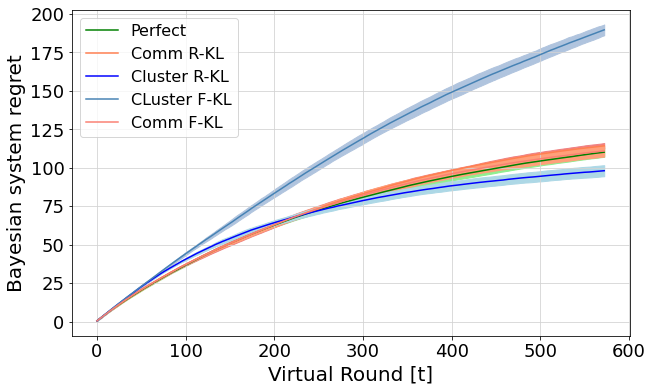

In [51]:
plt.fig = plt.figure(figsize=(10, 6))
# plt.title('Average State Regret'.format(s), fontsize=22)
plt.plot(arr_perfect_regret.mean(axis=0), color='green', label="Perfect")
plt.plot(arr_comm_regret.mean(axis=0), color='coral', label="Comm R-KL")
# plt.plot(arr_comm_marginal_regret.mean(axis=0), color='r', label="Comm_Marginal")
plt.plot(arr_cluster_regret.mean(axis=0), color='b', label="Cluster R-KL")
plt.plot(arr_cluster_rev_regret.mean(axis=0), color='steelblue', label="CLuster F-KL")
#plt.plot(arr_comm_fixed_regret.mean(axis=0), color='gray', label="Comm_Fixed")
plt.plot(arr_comm_rev_regret.mean(axis=0), color='salmon', label="Comm F-KL")

plt.fill_between(np.arange(len(arr_perfect_regret.mean(axis=0))),
                 arr_perfect_regret.mean(axis=0) - arr_perfect_regret.std(axis=0),
                 arr_perfect_regret.mean(axis=0) + arr_perfect_regret.std(axis=0),
                 color='lightgreen')

plt.fill_between(np.arange(len(arr_comm_regret.mean(axis=0))),
         arr_comm_regret.mean(axis=0) - arr_comm_regret.std(axis=0),
         arr_comm_regret.mean(axis=0) + arr_comm_regret.std(axis=0),
         color='lightcoral')
plt.fill_between(np.arange(len(arr_comm_rev_regret.mean(axis=0))),
                 arr_comm_rev_regret.mean(axis=0) - arr_comm_rev_regret.std(axis=0),
                 arr_comm_rev_regret.mean(axis=0) + arr_comm_rev_regret.std(axis=0),
                 color='lightsalmon')


"""plt.fill_between(np.arange(len(arr_comm_marginal_regret.mean(axis=0))),
                 arr_comm_marginal_regret.mean(axis=0) - arr_comm_marginal_regret.std(axis=0),
                 arr_comm_marginal_regret.mean(axis=0) + arr_comm_marginal_regret.std(axis=0),
                 color='r', alpha=0.3)"""

plt.fill_between(np.arange(len(arr_cluster_regret.mean(axis=0))),
                 arr_cluster_regret.mean(axis=0) - arr_cluster_regret.std(axis=0),
                 arr_cluster_regret.mean(axis=0) + arr_cluster_regret.std(axis=0),
                color='lightblue')

plt.fill_between(np.arange(len(arr_cluster_rev_regret.mean(axis=0))),
                 arr_cluster_rev_regret.mean(axis=0) - arr_cluster_rev_regret.std(axis=0),
                 arr_cluster_rev_regret.mean(axis=0) + arr_cluster_rev_regret.std(axis=0),
                 color='lightsteelblue')

"""plt.fill_between(np.arange(len(arr_comm_fixed_regret.mean(axis=0))),
                 arr_comm_fixed_regret.mean(axis=0) - arr_comm_fixed_regret.std(axis=0),
                 arr_comm_fixed_regret.mean(axis=0) + arr_comm_fixed_regret.std(axis=0),
                 color='gray', alpha=0.3)"""

plt.xlabel('Virtual Round [t]',  fontsize=20)
_ = plt.ylabel('Bayesian system regret', fontsize=20)
plt.tick_params(axis='both', labelsize=18)
_ = plt.legend(fontsize=16)
_ = plt.grid('on', color='lightgray')
_ = plt.savefig('imgs_jsait/regret_'+experiment+'.pdf')

# Cumulative Rewards #

In [ ]:
# Plot Cumulatives 
start_t = -100
end_t = -1
fig, ax = plt.subplots(figsize=(18,10))
font = {'size':28}

perfect_mean_reward = []
comm_mean_reward = []
marginal_mean_reward = []
cluster_mean_reward = []
cluster_rev_mean_reward = []
comm_rev_mean_reward = []
optimal_mean_reward = []
comm_rev_mean_reward = []

for s in range(n_states):
    comm_mean_reward.append(comm_agent.histories[s][start_t:end_t].reward.mean())
    perfect_mean_reward.append(perfect_agent.histories[s][start_t:end_t].reward.mean())
    # marginal_mean_reward.append(marginal_agent.histories[s][start_t:end_t].reward.mean())
    cluster_mean_reward.append(cluster_agent.histories[s][start_t:end_t].reward.mean())
    cluster_rev_mean_reward.append(cluster_rev_agent.histories[s][start_t:end_t].reward.mean())
    comm_rev_mean_reward.append(comm_rev_agent.histories[s][start_t:end_t].reward.mean())
    optimal_mean_reward.append(optimal_agent.histories[s][start_t:end_t].reward.mean())
    # comm_rev_mean_reward.append(comm_rev_agent.histories[s][start_t:end_t].reward.mean())
    
comm_mean_reward = np.asarray(comm_mean_reward)
perfect_mean_reward = np.asarray(perfect_mean_reward)
marginal_mean_reward = np.asarray(marginal_mean_reward)
cluster_mean_reward = np.asarray(cluster_mean_reward)
cluster_rev_mean_reward = np.asarray(cluster_rev_mean_reward)
comm_rev_mean_reward = np.asarray(comm_rev_mean_reward)
optimal_mean_reward = np.asarray(optimal_mean_reward)
# comm_rev_mean_reward = np.asarray(comm_rev_mean_reward)



ind = np.arange(n_states)  
width = 0.15
eps = 0.3

_ = ax.bar(ind - 2* width, perfect_mean_reward, width,
                label='Perfect', color='limegreen')

_ = ax.bar(ind - width, comm_mean_reward, width,
                label='Comm', color='cornflowerblue', hatch='/')

"""_ = ax.bar(ind, marginal_mean_reward, width, 
                    label='Marginal', color='r', hatch='.')"""

_ = ax.bar(ind, cluster_rev_mean_reward, width,
                    label='cluster_rev', color='r', hatch='.')

_ = ax.bar(ind + width, cluster_mean_reward, width,
                    label='Cluster_kl', color='b', hatch='\\')

_ = ax.bar(ind + 2*width, comm_rev_mean_reward, width,
                    label='Comm_rev', color='gray', hatch='\\')

_ = ax.bar(ind + 3*width, optimal_mean_reward, width,
                    label='Optimal', color='brown', hatch='\\')



ax.set_ylabel('Mean Reward', fontdict=font)
ax.set_xlabel('State', fontdict=font)
ax.set_xticks(np.arange(n_states))
ax.set_xticklabels(np.arange(n_states))
ax.set_ylim(0,1)
ax.tick_params(axis="y", labelsize=24)
ax.tick_params(axis="x", labelsize=24)
plt.grid(alpha=0.5, axis='y')

#leg1 = ax.legend((rects1), ['Perfect CSI'], loc="lower left", fontsize=22, mode="expand", ncol=1, bbox_to_anchor=(0, 1.02, 1, 0.2))
_ = ax.legend(loc="lower left", prop=font, mode="expand", ncol=4, bbox_to_anchor=(0.05, 1.02, 0.9, 0.2))


# Plot Rate # 

In [52]:
mean_tot_perfect_rate = np.mean([ e for e in tot_perfect_rate.values()], axis=0)
std_tot_perfect_rate = np.std([ e for e in tot_perfect_rate.values()], axis=0)

mean_tot_cluster_rate = np.mean([ e for e in tot_cluster_rate.values()], axis=0)
std_tot_cluster_rate = np.std([ e for e in tot_cluster_rate.values()], axis=0)

In [53]:
mean_tot_perfect_rate

array([0.        , 0.03047846, 0.06290276, 0.09042001, 0.11882323,
       0.14813275, 0.17846445, 0.20766916, 0.23493481, 0.26257908,
       0.29250425, 0.31861437, 0.34855997, 0.37836838, 0.39699227,
       0.42117669, 0.45016733, 0.47350234, 0.49651544, 0.51267342,
       0.5392757 , 0.55527146, 0.57905935, 0.59784329, 0.61586401,
       0.64491499, 0.66027235, 0.67957684, 0.69328827, 0.71049263,
       0.71405754, 0.71881238, 0.73770729, 0.75382123, 0.75241661,
       0.7524681 , 0.76690584, 0.78276155, 0.78548036, 0.78200595,
       0.78514985, 0.80657479, 0.81182084, 0.81744338, 0.81550951,
       0.82455699, 0.82814259, 0.85146405, 0.84917162, 0.85176812,
       0.85708737, 0.85664354, 0.8638228 , 0.86709493, 0.8623585 ,
       0.87887946, 0.86465343, 0.87197835, 0.88158077, 0.86602874,
       0.87607218, 0.89178755, 0.89830988, 0.91349808, 0.91266255,
       0.91745198, 0.92692804, 0.92861206, 0.93143147, 0.93095011,
       0.93603032, 0.93048079, 0.9389944 , 0.94234547, 0.95894

In [54]:
xs = np.arange(len(mean_tot_perfect_rate))

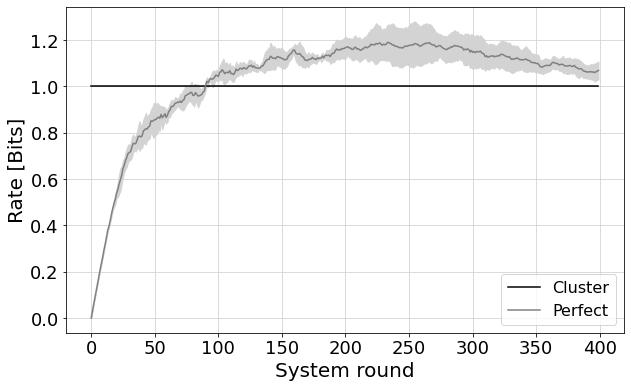

In [57]:
fig = plt.figure(figsize=(10, 6))
# plt.title('Agents Needed Bit-Rate', fontsize=22)
plt.plot(mean_tot_cluster_rate, color='black', label="Cluster")
plt.plot(mean_tot_perfect_rate, color='gray', label="Perfect")

"""plt.plot(comm_agent.rate_history, color='cornflowerblue', label="Comm")
plt.plot(cluster_agent.rate_history, color='b', label="Cluster")
plt.plot(cluster_rev_agent.rate_history, color='b', label="Cluster_Rev")
plt.plot(comm_fixed_agent.rate_history, color='red', label="Comm_Fixed")
plt.plot(comm_rev_agent.rate_history, color='red', label="Comm_Rev")"""

plt.fill_between(xs, mean_tot_perfect_rate - std_tot_perfect_rate,
                mean_tot_perfect_rate + std_tot_perfect_rate, 
                color='lightgray')

plt.fill_between(xs, mean_tot_cluster_rate - std_tot_cluster_rate,
                mean_tot_cluster_rate + std_tot_cluster_rate, 
                color='black')

plt.xlabel('System round',  fontsize=20)
plt.ylabel('Rate [Bits]', fontsize=20)
plt.tick_params(axis='both', labelsize=18)
_ = plt.legend(loc='lower right', fontsize=16)
_ = plt.grid('on', color='lightgray')
_ = plt.savefig('imgs_jsait/rate_' + experiment + '.pdf')

# Plot Distortions #

In [ ]:
cluster_agent.dist_history

In [ ]:
fig = plt.figure(figsize=(10, 6))
plt.title('Perfect Policy Dynamics', fontsize=22)

plt.plot(comm_agent.dist_history, color='b', label='Comm')
plt.plot(comm_rev_agent.dist_history, color='gray', label='Comm_Rev')
plt.plot(cluster_agent.dist_history, color='r', label='Cluster')
plt.xlabel('Iteration',  fontsize=20)
_ = plt.ylabel('KL', fontsize=20)
plt.tick_params(axis='both', labelsize=18)

_ = plt.legend()

In [ ]:
# Load Target Policy KL-Divergence over Time

target_kl = pickle.load(open("comm_bandits/results/{}/kl_target.pkl".format(experiment), "rb"))
fig = plt.figure(figsize=(12, 8))
plt.plot(target_kl, color='b', marker='*')
ths = np.ones(len(target_kl)) * 0.01
plt.plot(ths, color='gray')

In [ ]:
experiment

In [ ]:
ps_perfect = []
ps_comm = []
ps_comm_fixed = []
ps_marginal = []
ps_cluster = []
ps_cluster_rev = []
ps_comm_rev = []
group_size = 1

for s in range(n_states):
    ps_perfect.append(perfect_agent.policies[s, int(np.floor(s / group_size))])
    ps_comm.append(comm_agent.policies[s, int(np.floor(s / group_size))])
    ps_comm_fixed.append(comm_fixed_agent.policies[s, int(np.floor(s / group_size))])
    ps_comm_rev.append(comm_rev_agent.policies[s, int(np.floor(s / group_size))])
    ps_cluster.append(cluster_agent.policies[s, int(np.floor(s / group_size))])
    ps_cluster_rev.append(cluster_rev_agent.policies[s, int(np.floor(s / group_size))])


fig = plt.figure(figsize=(10, 6))
plt.title('Best Action Proability'.format(s), fontsize=22)
#plt.plot(ps_perfect, marker='*', color='limegreen', label="Perfect")
plt.plot(ps_comm,  marker='*', color='cornflowerblue', label="Comm")
plt.plot(ps_comm_fixed,  marker='*', color='black', label="Comm_Fixed")
plt.plot(ps_comm_rev, color='r',  marker='*', label="comm_rev")
plt.plot(ps_cluster, color='b', marker='*', label="Cluster_kl")
plt.plot(ps_cluster_rev, color='yellow', marker='*', label="cluster_rev")
plt.grid('on', color='lightgray')
plt.ylim(0, 1.05)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=14)                                    

In [ ]:
ps_perfect = []
ps_comm = []
ps_comm_rev = []
ps_marginal = []
ps_cluster = []
ps_cluster_rev = []
ps_comm_rev = []
ps_comm_fixed = []
group_size = 1

for s in range(n_states):
    ps_perfect.append(perfect_agent.policies[s, int(np.floor(s / group_size))])
    ps_comm.append(comm_agent.sampling_policies[s, int(np.floor(s / group_size))])
    ps_comm_fixed.append(comm_fixed_agent.policies[s, int(np.floor(s / group_size))])
    ps_comm_rev.append(comm_rev_agent.sampling_policies[s, int(np.floor(s / group_size))])
    ps_cluster.append(cluster_agent.sampling_policies[s, int(np.floor(s / group_size))])
    ps_cluster_rev.append(cluster_rev_agent.sampling_policies[s, int(np.floor(s / group_size))])


fig = plt.figure(figsize=(10, 6))
plt.title('Best Action Proability'.format(s), fontsize=22)
# plt.plot(ps_perfect, marker='*', color='limegreen', label="Perfect")
plt.plot(ps_comm,  marker='*', color='cornflowerblue', label="Comm")
# plt.plot(ps_comm_fixed,  marker='*', color='black', label="Comm_Fixed")
plt.plot(ps_comm_rev, color='r',  marker='*', label="comm_rev")
plt.plot(ps_cluster, color='b', marker='*', label="Cluster_kl")
plt.plot(ps_cluster_rev, color='yellow', marker='*', label="cluster_rev")
plt.grid('on', color='lightgray')
plt.ylim(0, 1.05)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=14)                                    

In [ ]:
# Explore Policies 

ps_perfect = []
ps_comm = []
ps_comm_rev = []
ps_marginal = []
ps_cluster = []
ps_cluster_rev = []
ps_comm_rev = []
group_size = 1

for s in range(n_states):
    fig = plt.figure(figsize=(10, 6))
    plt.title('Best Action Proability'.format(s), fontsize=22)
    plt.plot(comm_agent.sampling_policies[s, :],  marker='*', color='cornflowerblue', label="Comm")
    plt.plot(comm_rev_agent.sampling_policies[s, :], color='r',  marker='*', label="comm_rev")
    plt.plot(cluster_agent.sampling_policies[s, :], color='b', marker='*', label="Cluster_kl")
    plt.plot(cluster_rev_agent.sampling_policies[s, :], color='yellow', marker='*', label="cluster_rev")
    plt.grid('on', color='lightgray')
    plt.ylim(0, 1.05)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.legend(fontsize=14)                                    

In [ ]:
for i, e in enumerate(cluster_rev_agent.policies):
    print('State {} Action {} with prob. {}'.format(i, np.argmax(e), e[np.argmax(e)]))

In [ ]:
cluster_agent.policies[11]

In [ ]:
l1_perfect = []
l1_comm = []
l1_comm_l1 = []
l1_marginal = []
l1_cluster = []
l1_cluster_rev = []
l1_comm_rev = []

for s in range(n_states):
    l1_comm.append(np.linalg.norm(comm_agent.policies[s, :] - perfect_agent.policies[s, :], ord=1)/2)
    # l1_comm_l1.append(np.linalg.norm(comm_l1_agent.policies[s, :] - perfect_agent.policies[s, :], ord=1)/2)
    # l1_marginal.append(np.linalg.norm(marginal_agent.policies[s, :] - perfect_agent.policies[s, :], ord=1)/2)
    l1_cluster.append(np.linalg.norm(cluster_agent.policies[s, :] - perfect_agent.policies[s, :], ord=1)/2)
    l1_cluster_rev.append(np.linalg.norm(cluster_rev_agent.policies[s, :] - perfect_agent.policies[s, :], ord=1)/2)
    l1_comm_rev.append(np.linalg.norm(comm_rev_agent.policies[s, :] - perfect_agent.policies[s, :], ord=1)/2)


fig = plt.figure(figsize=(10, 6))
plt.title('TV Distance w.r.t. Perfect Policy'.format(s), fontsize=22)
plt.plot(l1_comm,  marker='*', color='cornflowerblue', label="Comm")
plt.plot(l1_comm_rev,  marker='*', color='black', label="Comm_Rev")
"""plt.plot(l1_marginal, color='r',  marker='*', label="Marginal")"""
plt.plot(l1_cluster, color='b', marker='*', label="Cluster_kl")
plt.plot(l1_cluster_rev, color='yellow', marker='*', label="cluster_rev")

plt.grid('on', color='lightgray')
plt.ylim(0)
plt.legend()                                    

In [ ]:
f_x

In [ ]:
#print("Average TV with l1 agent {}".format(np.dot(l1_comm_rev, f_x.T)))
print("Average TV with kl agent {}".format(np.dot(comm, f_x.T)))
#print("Average TV with marginal agent {}".format(np.dot(l1_marginal, f_x.T)))
print("Average TV with cluster_kl agent {}".format(np.dot(cluster_mean_reward, f_x.T)))
print("Average TV with cluster_rev agent {}".format(np.dot(cluster_rev_mean_reward, f_x.T)))
print("Average TV with comm_rev agent {}".format(np.dot(comm_rev_mean_reward, f_x.T)))

In [ ]:
print("Average reward with Rev agent {}".format(np.dot(comm_rev_mean_reward, f_x.T)))
print("Average reward with kl agent {}".format(np.dot(comm_mean_reward, f_x.T)))
# print("Average reward with marginal agent {}".format(np.dot(marginal_mean_reward, f_x.T)))
print("Average reward with cluster_kl agent {}".format(np.dot(cluster_mean_reward, f_x.T)))
print("Average reward with cluster_rev agent {}".format(np.dot(cluster_rev_mean_reward, f_x.T)))
print("Average reward with perfect agent {}".format(np.dot(perfect_mean_reward, f_x.T)))
print("Average reward with optimal agent {}".format(np.dot(optimal_mean_reward, f_x.T)))
# print("Average reward with comm fixed agent {}".format(np.dot(comm_rev_mean_reward, f_x.T)))